<a href="https://colab.research.google.com/github/shizoda/education/blob/main/info/bayes_infection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 病気の検査の問題

概ね [こちらの記事](https://codezine.jp/article/detail/14581) に沿ったものとなっています．

In [73]:
# 病気の有病率 (全人口に対する患者の割合)
PH = 0.001  # 0.1% を小数で表現

# 検査の感度 (病気の人が陽性と判定される確率)
PDH = 0.99  # 99%

# 検査の特異度 (健康な人が陰性と判定される確率)
PnotDnotH = 0.97  # 97%

ベイズの定理により、陽性結果を得た場合の病気にかかっている確率 $ P(H|D) $ を求めます。
$$
P(H|D) = \frac{P(D|H)  P(H)}{P(D)}
$$
ここで \(P(D)\) は、全体の陽性率であり、次のように計算されます。
$$
P(D) = P(D|H) P(H) + P(D|\overline{H})  P(\overline{H})
$$



In [62]:
def test(PH, PDH, PnotDnotH):

  # 偽陽性率 (健康な人が陽性と判定される確率) は 1 - 特異度 で計算されます
  PDnotH = 1 - PnotDnotH

  # 各成分を計算します
  PHD = PDH * PH  # 病気の人が陽性と判定される確率
  PDnotH = PDnotH * (1 - PH)  # 健康な人が陽性と判定される確率

  # 全体の陽性率 P(D)
  PD = PHD + PDnotH

  # ベイズの定理を用いて P(H|D) を計算します
  # 右辺       PHD / PH  と同義ですが，定理の式に合わせます
  PHD = (PDH * PH) / PD

  return PHD

# 結果を表示します
PHD = test(PH, PDH, PnotDnotH)
print(f"陽性結果を得た場合の病気にかかっている確率 P(H|D) は {PHD:.3f} ({PHD * 100:.1f} %) です。")

陽性結果を得た場合の病気にかかっている確率 P(H|D) は 0.032 (3.2 %) です。


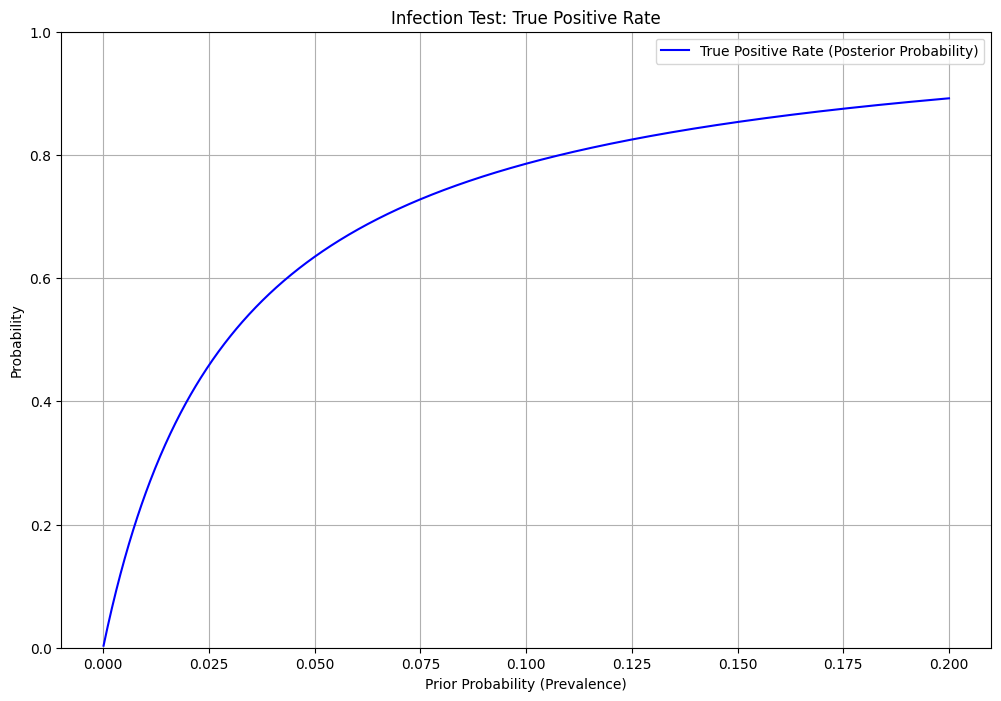

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 事前確率（有病率）の範囲を設定
prior_probabilities = np.linspace(0.0001, 0.2, 1000)  # 0.01% から 20% まで

# 検査の感度と特異度を設定
sensitivity = 0.99  # 感度 99%
specificity = 0.97  # 特異度 97%

# 各事前確率に対して事後確率を計算
posterior_probabilities = [test(p, sensitivity, specificity) for p in prior_probabilities]

# 偽陽性率と偽陰性率の計算
false_positive_rates = [(1 - specificity) * (1 - p) for p in prior_probabilities]
false_negative_rates = [(1 - sensitivity) * p for p in prior_probabilities]

# グラフを描画
plt.figure(figsize=(12, 8))
plt.plot(prior_probabilities, posterior_probabilities, label='True Positive Rate (Posterior Probability)', color='blue')
plt.xlabel('Prior Probability (Prevalence)')
plt.ylabel('Probability')
plt.title('Infection Test: True Positive Rate')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)

# グラフを表示
plt.show()

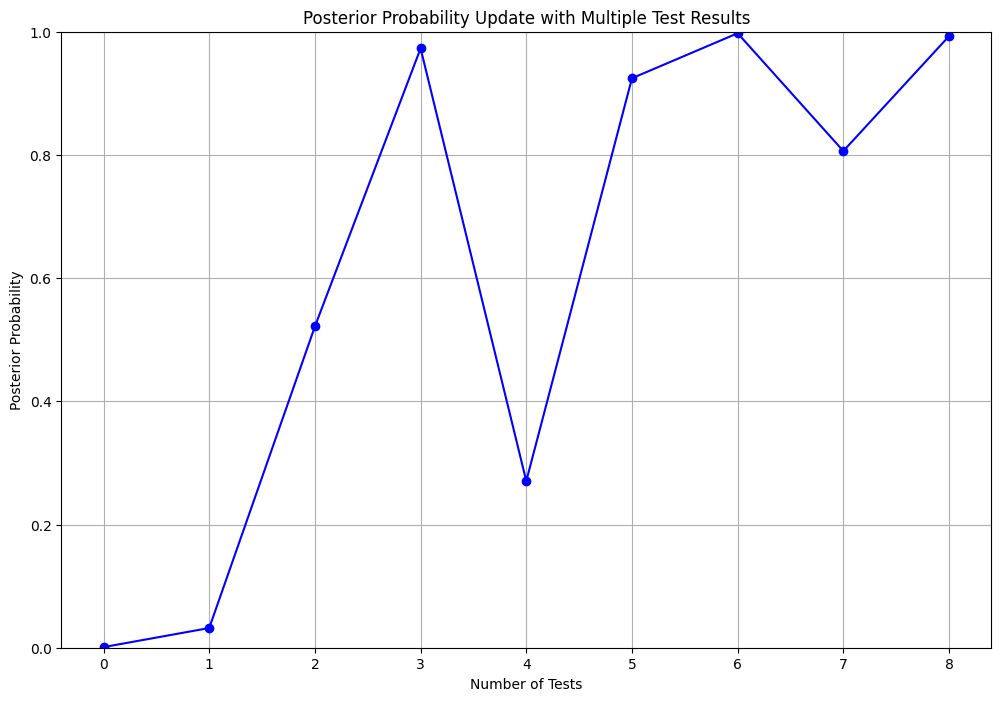

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# 初期の事前確率
prior_probability = 0.001  # 初期の有病率を1%と仮定

# 検査の感度と特異度
sensitivity = 0.99  # 感度 99%
specificity = 0.97  # 特異度 97%

# 複数回の検査結果
test_results = [1, 1, 1, 0, 1, 1, 0, 1]

# 各検査結果に基づく事後確率を計算
posterior_probabilities = [prior_probability]
current_prior = prior_probability

for result in test_results:
    if result == 1:
        current_posterior = test(current_prior, sensitivity, specificity)
    else:
        current_posterior = test(current_prior, 1 - sensitivity, 1 - specificity)
    posterior_probabilities.append(current_posterior)
    current_prior = current_posterior

# グラフを描画
plt.figure(figsize=(12, 8))
plt.plot(range(len(posterior_probabilities)), posterior_probabilities, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Tests')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability Update with Multiple Test Results')
plt.xticks(range(len(posterior_probabilities)))
plt.grid(True)
plt.ylim(0, 1)

# グラフを表示
plt.show()
